In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("BTC_data.csv")

# our columns does not have a name, so we will give them names
df.columns = ["index",  "Price", "Symbol", "shortVolUsd", "longVolUsd", "buyTurnoverNumber",
              "sellTurnoverNumber", "NetVolUsd", "NetTurnoverNumber", "NetPosition", "updateTime"]

# we will get rid of the index column
df = df.drop("index", axis=1)

# we will get rows with highest and lowest net position and print them
print(df[df["NetPosition"] == df["NetPosition"].max()])
print(df[df["NetPosition"] == df["NetPosition"].min()])

# get the rows with highest and lowest price and print them
print(df[df["Price"] == df["Price"].max()])
print(df[df["Price"] == df["Price"].min()])


              Price Symbol   shortVolUsd    longVolUsd  buyTurnoverNumber  \
42152  24829.830526    BTC  2.341263e+10  2.674250e+10            6001898   

       sellTurnoverNumber     NetVolUsd  NetTurnoverNumber    NetPosition  \
42152             5665384  3.329867e+09             336514  134107.516887   

                    updateTime  
42152  2023-02-16 01:23:56.639  
              Price Symbol   shortVolUsd    longVolUsd  buyTurnoverNumber  \
20927  21470.005263    BTC  1.335825e+10  1.224066e+10            3253326   

       sellTurnoverNumber     NetVolUsd  NetTurnoverNumber   NetPosition  \
20927             3500002 -1.117590e+09            -246676 -52053.561905   

                    updateTime  
20927  2023-02-13 17:39:55.483  
              Price Symbol   shortVolUsd    longVolUsd  buyTurnoverNumber  \
50033  25229.114737    BTC  2.733598e+10  2.991463e+10            6846448   

       sellTurnoverNumber     NetVolUsd  NetTurnoverNumber    NetPosition  \
50033             

In [2]:
# get the rows where net position is higher than 100000
print(df[df["NetPosition"] > 100000])

              Price Symbol   shortVolUsd    longVolUsd  buyTurnoverNumber  \
9251   22002.167368    BTC  6.145037e+09  6.665327e+09            1751751   
9252   22002.098947    BTC  6.147127e+09  6.667194e+09            1752277   
9276   22051.955789    BTC  6.227336e+09  6.722978e+09            1764322   
9277   22054.297895    BTC  6.231030e+09  6.725375e+09            1764745   
31917  22131.861053    BTC  1.274037e+10  1.326815e+10            3388604   
...             ...    ...           ...           ...                ...   
52597  24496.754211    BTC  2.616304e+10  2.670724e+10            6370682   
52598  24497.222105    BTC  2.616324e+10  2.670762e+10            6370808   
52599  24500.259474    BTC  2.614630e+10  2.668738e+10            6363849   
52600  24500.991053    BTC  2.614643e+10  2.668821e+10            6364022   
52601  24507.128947    BTC  2.614834e+10  2.668973e+10            6364751   

       sellTurnoverNumber     NetVolUsd  NetTurnoverNumber   NetPosition  \

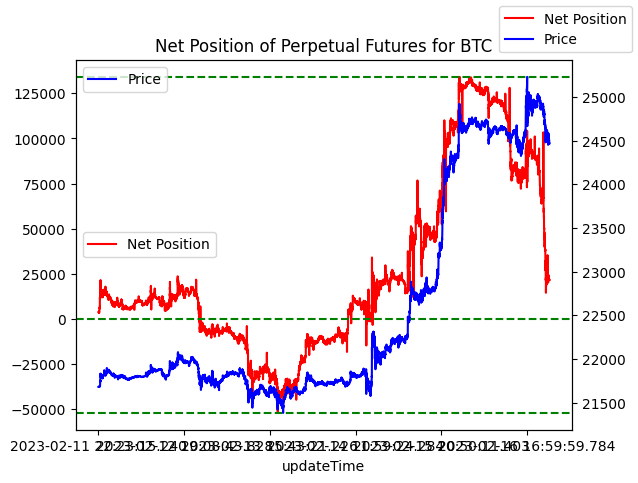

In [3]:

# plot the net position over time with a line graph 
ax = df.plot(x="updateTime", y="NetPosition", kind="line", color="red", label="Net Position")
ax2 = ax.twinx()
df.plot(x="updateTime", y="Price", kind="line", color="blue", label="Price", ax=ax2)
ax.figure.legend()

# lets mark the the max min points of net position and where it went below 0
ax.axhline(y=df["NetPosition"].max(), color="green", linestyle="--")
ax.axhline(y=df["NetPosition"].min(), color="green", linestyle="--")
ax.axhline(y=0, color="green", linestyle="--")
plt.title("Net Position of Perpetual Futures for BTC")
plt.show()


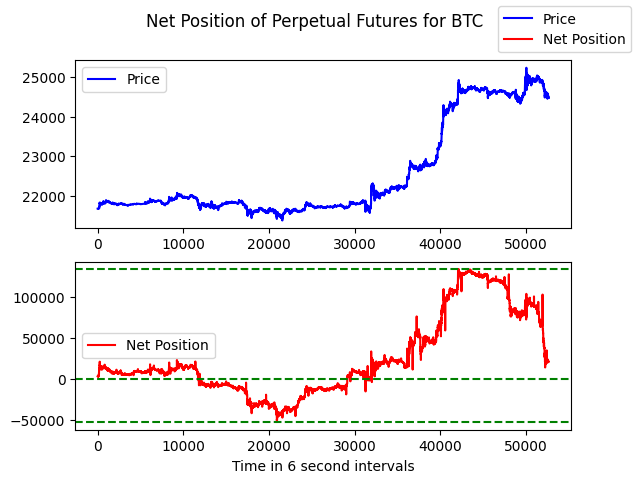

In [5]:
# plot the price and net position  with a line graph  in the same figure where price stands on top half of the fig and net position  stands on bottom half of the figure
fig, (ax1, ax2) = plt.subplots(2, 1)
df.plot(y="Price", kind="line", color="blue", label="Price", ax=ax1)
df.plot(y="NetPosition", kind="line", color="red", label="Net Position", ax=ax2)

# x labels are the same for both graphs, so we will only label the x axis of the bottom graph as time
ax2.set_xlabel("Time in 6 second intervals")

# lets mark the the max min points of net position and where it went below0
ax2.axhline(y=df["NetPosition"].max(), color="green", linestyle="--")
ax2.axhline(y=df["NetPosition"].min(), color="green", linestyle="--")
ax2.axhline(y=0, color="green", linestyle="--")


fig.suptitle("Net Position of Perpetual Futures for BTC")
ax1.figure.legend()
plt.show()

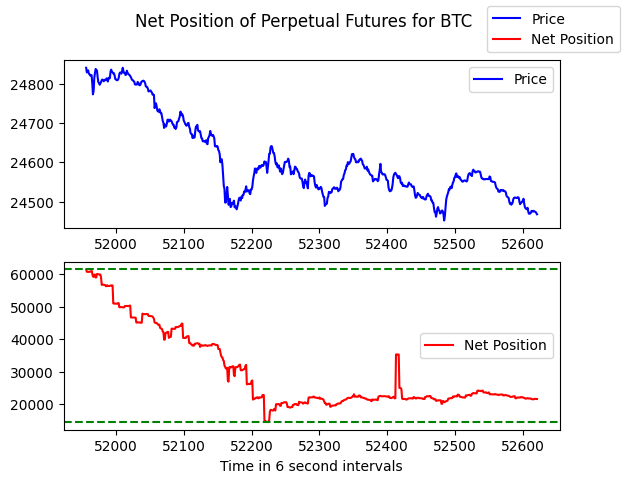

In [6]:
# create another df that shows only last 666 rows
df2 = df.tail(666)

# plot the price and net position  with a line graph  in the same figure where price stands on top half of the fig and net position  stands on bottom half of the figure
fig, (ax1, ax2) = plt.subplots(2, 1)
df2.plot(y="Price", kind="line", color="blue", label="Price", ax=ax1)
df2.plot(y="NetPosition", kind="line", color="red", label="Net Position", ax=ax2)

# x labels are the same for both graphs, so we will only label the x axis of the bottom graph as time
ax2.set_xlabel("Time in 6 second intervals")

# lets mark the the max min points of net position and where it went below0
ax2.axhline(y=df2["NetPosition"].max(), color="green", linestyle="--")
ax2.axhline(y=df2["NetPosition"].min(), color="green", linestyle="--")


fig.suptitle("Net Position of Perpetual Futures for BTC")
ax1.figure.legend()
plt.show()
